In [1]:
import kagglehub
path = kagglehub.dataset_download("rabieelkharoua/predict-conversion-in-digital-marketing-dataset")

100%|██████████| 529k/529k [00:00<00:00, 66.6MB/s]

Extracting files...


# Task
Perform an A/B testing analysis on the dataset located at `'/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1'`, including data preparation, hypothesis definition, metric calculation, statistical testing, result interpretation, visualization, and a final summary with recommendations, generating `ab_test_summary.csv` and `final_recommendation.txt`.

## Load Dataset and Prepare Data

### Subtask:
Load the dataset and identify the control and test groups. This step will also involve any necessary data cleaning or preprocessing to prepare for the A/B test.


**Reasoning**:
First, I'll import the pandas library to work with DataFrames. Then, I'll construct the full path to the CSV file using the `path` variable from the previous step and load the data into a pandas DataFrame. After loading, I will display the first few rows to get an initial understanding of the data structure and content.



In [2]:
import pandas as pd
import os

# Construct the full path to the CSV file
file_path = os.path.join(path, 'ab_test.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1/ab_test.csv'

**Reasoning**:
The previous attempt to load `ab_test.csv` failed because the file was not found. I will now attempt to load the `conversion_data.csv` file, which is a common name for the main dataset file in this context. After successfully loading the data, I will display the first few rows, check for missing values and duplicates, and identify the unique values in the 'test group' column, which likely distinguishes the control and test groups.



In [3]:
import pandas as pd
import os

# Construct the full path to the CSV file, assuming 'conversion_data.csv' as the main file
file_path = os.path.join(path, 'conversion_data.csv')

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(df.head())

# Check for missing values
print('\nMissing values in the dataset:')
print(df.isnull().sum())

# Check for duplicate rows
print('\nNumber of duplicate rows:')
print(df.duplicated().sum())

# Identify the column that distinguishes between control and test groups
# Assuming 'test group' or 'group' is the column name based on A/B testing context
# Let's check for 'test group' and 'group' as potential column names
group_col = None
if 'test group' in df.columns:
    group_col = 'test group'
elif 'group' in df.columns:
    group_col = 'group'

if group_col:
    print(f'\nUnique values in the \'{group_col}\' column (Control/Test groups):')
    print(df[group_col].value_counts())
else:
    print('\nCould not identify a clear \'test group\' or \'group\' column. Please inspect the DataFrame to find it.')

FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1/conversion_data.csv'

**Reasoning**:
The previous attempts to load specific CSV files failed because the files were not found. To resolve this, I will list all files within the dataset directory using `os.listdir(path)` to identify the correct CSV file name. Then, I will load the identified CSV file into a pandas DataFrame.



In [4]:
import pandas as pd
import os

# List all files in the downloaded directory to identify the correct CSV file
print(f"Files in the dataset directory: {os.listdir(path)}")

# Assuming the correct file name is one of the listed files, let's try the most probable one or iterate if needed.
# For now, let's assume it's 'marketing_campaign.csv' based on common dataset names or if inspection of the list suggests it.
# If this also fails, we'll need to manually pick from the printed list.
file_name = 'marketing_campaign.csv'
file_path = os.path.join(path, file_name)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(df.head())

# Check for missing values
print('\nMissing values in the dataset:')
print(df.isnull().sum())

# Check for duplicate rows
print('\nNumber of duplicate rows:')
print(df.duplicated().sum())

# Identify the column that distinguishes between control and test groups
group_col = None
possible_group_cols = ['test group', 'group', 'campaign', 'variant', 'experiment_group'] # Added more possibilities

for col in possible_group_cols:
    if col in df.columns:
        group_col = col
        break

if group_col:
    print(f'\nUnique values in the \'{group_col}\' column (Control/Test groups):')
    print(df[group_col].value_counts())
else:
    print('\nCould not identify a clear test group column. Please inspect the DataFrame columns to find it.')


Files in the dataset directory: ['digital_marketing_campaign_dataset.csv']


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/rabieelkharoua/predict-conversion-in-digital-marketing-dataset/versions/1/marketing_campaign.csv'

**Reasoning**:
The previous code correctly identified the file name as 'digital_marketing_campaign_dataset.csv' from the directory listing. I will update the `file_name` variable to use this correct name to resolve the `FileNotFoundError` and proceed with loading the data.



In [5]:
import pandas as pd
import os

# List all files in the downloaded directory to identify the correct CSV file
print(f"Files in the dataset directory: {os.listdir(path)}")

# Correcting the file name based on the directory listing
file_name = 'digital_marketing_campaign_dataset.csv'
file_path = os.path.join(path, file_name)

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print('First 5 rows of the dataset:')
print(df.head())

# Check for missing values
print('\nMissing values in the dataset:')
print(df.isnull().sum())

# Check for duplicate rows
print('\nNumber of duplicate rows:')
print(df.duplicated().sum())

# Identify the column that distinguishes between control and test groups
group_col = None
possible_group_cols = ['test group', 'group', 'campaign', 'variant', 'experiment_group', 'Campaign'] # Added 'Campaign' based on common naming conventions

for col in possible_group_cols:
    if col in df.columns:
        group_col = col
        break

if group_col:
    print(f'\nUnique values in the \'{group_col}\' column (Control/Test groups):')
    print(df[group_col].value_counts())
else:
    print('\nCould not identify a clear test group column. Please inspect the DataFrame columns to find it.')

Files in the dataset directory: ['digital_marketing_campaign_dataset.csv']
First 5 rows of the dataset:
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4         

**Reasoning**:
The previous step successfully loaded the data and performed initial checks, but could not automatically identify a column that distinguishes between control and test groups. Based on the `df.head()` output, the 'CampaignType' column seems like a potential candidate for grouping. I will inspect the unique values and counts of the 'CampaignType' column to confirm if it represents the control and test groups and then explicitly define them.



In [6]:
import pandas as pd
import os

# The dataframe 'df' is already loaded from the previous step
# It contains the 'digital_marketing_campaign_dataset.csv'

# Inspect the 'CampaignType' column as a potential group identifier
print("\nUnique values and counts in 'CampaignType' column:")
print(df['CampaignType'].value_counts())

# Assuming 'Awareness' is the control group and 'Conversion' is the test group based on typical A/B testing scenarios
# If other values are present, further inspection might be needed.
control_group_name = 'Awareness'
test_group_name = 'Conversion'

if control_group_name in df['CampaignType'].unique() and test_group_name in df['CampaignType'].unique():
    print(f"\nIdentified Control Group: '{control_group_name}'")
    print(f"Identified Test Group: '{test_group_name}'")
    # Filter the DataFrame into control and test groups
    control_group_df = df[df['CampaignType'] == control_group_name]
    test_group_df = df[df['CampaignType'] == test_group_name]
    print(f"\nControl Group DataFrame shape: {control_group_df.shape}")
    print(f"Test Group DataFrame shape: {test_group_df.shape}")
else:
    print("\nCould not clearly define control and test groups using 'CampaignType' with 'Awareness' and 'Conversion'.")
    print("Please manually inspect the 'CampaignType' column or other relevant columns to define groups.")



Unique values and counts in 'CampaignType' column:
CampaignType
Conversion       2077
Awareness        1988
Consideration    1988
Retention        1947
Name: count, dtype: int64

Identified Control Group: 'Awareness'
Identified Test Group: 'Conversion'

Control Group DataFrame shape: (1988, 20)
Test Group DataFrame shape: (2077, 20)


## Define Hypotheses and Significance Level

### Subtask:
Clearly state the null (H0) and alternative (H1) hypotheses for the A/B test and set the significance level (alpha) to 0.05. This step is conceptual but crucial for the analysis.


### Hypotheses and Significance Level

**Null Hypothesis (H0):** There is no statistically significant difference in the conversion rate between the 'Awareness' campaign type (control group) and the 'Conversion' campaign type (test group). Any observed difference is due to random chance.

**Alternative Hypothesis (H1):** There is a statistically significant difference in the conversion rate between the 'Awareness' campaign type (control group) and the 'Conversion' campaign type (test group).

**Significance Level (alpha):** We will set the significance level (α) to 0.05. This means we are willing to accept a 5% chance of incorrectly rejecting the null hypothesis (Type I error).

## Calculate Key Metrics

### Subtask:
Calculate the relevant metrics for both the control and test groups, such as conversion rates or mean values, depending on the nature of the data and the test objective.


**Reasoning**:
The subtask requires calculating key metrics like the number of observations, conversions, and conversion rates for both the control and test groups. I will use the previously defined `control_group_df` and `test_group_df` to perform these calculations as instructed.



In [7]:
import pandas as pd

# 1. Calculate metrics for the Control Group
control_n = control_group_df.shape[0]
control_conversions = control_group_df['Conversion'].sum()
control_conversion_rate = control_conversions / control_n

# 2. Calculate metrics for the Test Group
test_n = test_group_df.shape[0]
test_conversions = test_group_df['Conversion'].sum()
test_conversion_rate = test_conversions / test_n

# 3. Print the calculated metrics
print(f"Control Group (Awareness):")
print(f"  Number of observations (n): {control_n}")
print(f"  Number of conversions: {control_conversions}")
print(f"  Conversion Rate: {control_conversion_rate:.4f}\n")

print(f"Test Group (Conversion):")
print(f"  Number of observations (n): {test_n}")
print(f"  Number of conversions: {test_conversions}")
print(f"  Conversion Rate: {test_conversion_rate:.4f}")

Control Group (Awareness):
  Number of observations (n): 1988
  Number of conversions: 1701
  Conversion Rate: 0.8556

Test Group (Conversion):
  Number of observations (n): 2077
  Number of conversions: 1939
  Conversion Rate: 0.9336


## Perform Statistical Test

### Subtask:
Choose and execute the appropriate statistical test (e.g., chi-square test for conversion rates or t-test for means) to compare the metrics between the control and test groups.


**Reasoning**:
I need to perform a two-sample Z-test for proportions to compare the conversion rates of the control and test groups. I will import the necessary function, prepare the count and nobs arrays, execute the test, and print the results.



In [8]:
from statsmodels.stats.proportion import proportions_ztest

# Prepare the counts and number of observations for the z-test
count = [control_conversions, test_conversions]
nobs = [control_n, test_n]

# Perform the two-sample z-test for proportions
# alternative='two-sided' tests if the conversion rates are different
z_statistic, p_value = proportions_ztest(count, nobs=nobs, alternative='two-sided')

# Print the results
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: -8.1168
P-value: 0.0000


## Interpret P-value and Calculate Confidence Interval

### Subtask:
Extract the p-value from the statistical test and interpret its significance. Additionally, calculate the confidence interval for the difference in metrics between the two groups.


**Reasoning**:
I need to interpret the p-value and calculate the confidence interval for the difference in conversion rates by following the provided instructions. This involves setting the significance level, comparing the p-value, calculating the difference in conversion rates, computing the standard error of the difference, determining the critical Z-value, calculating the margin of error, and finally, the confidence interval.



In [9]:
import numpy as np
import math

# 1. Set the significance level (alpha)
alpha = 0.05

# 2. Interpret the calculated p_value
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (alpha): {alpha}")
if p_value < alpha:
    p_value_interpretation = "Reject the null hypothesis. There is a statistically significant difference in conversion rates."
else:
    p_value_interpretation = "Fail to reject the null hypothesis. There is no statistically significant difference in conversion rates."
print(f"Interpretation: {p_value_interpretation}\n")

# 3. Calculate the difference in conversion rates
difference_in_rates = test_conversion_rate - control_conversion_rate
print(f"Difference in Conversion Rates (Test - Control): {difference_in_rates:.4f}")

# 4. Calculate the standard error of the difference in proportions
# p1 = control_conversion_rate, n1 = control_n
# p2 = test_conversion_rate, n2 = test_n
standard_error_of_difference = math.sqrt(
    (control_conversion_rate * (1 - control_conversion_rate) / control_n) +
    (test_conversion_rate * (1 - test_conversion_rate) / test_n)
)
print(f"Standard Error of Difference: {standard_error_of_difference:.4f}")

# 5. Determine the critical Z-value for a 95% confidence interval
critical_z_value = 1.96 # For a 95% confidence interval (two-sided)
print(f"Critical Z-value (for 95% CI): {critical_z_value}")

# 6. Calculate the margin of error
margin_of_error = critical_z_value * standard_error_of_difference
print(f"Margin of Error: {margin_of_error:.4f}")

# 7. Calculate the lower and upper bounds of the 95% confidence interval
lower_bound = difference_in_rates - margin_of_error
upper_bound = difference_in_rates + margin_of_error

# 8. Print the interpretation of the p-value, the difference in conversion rates, and the calculated confidence interval.
print(f"\n95% Confidence Interval for the difference in conversion rates: [{lower_bound:.4f}, {upper_bound:.4f}]")


P-value: 0.0000
Significance Level (alpha): 0.05
Interpretation: Reject the null hypothesis. There is a statistically significant difference in conversion rates.

Difference in Conversion Rates (Test - Control): 0.0779
Standard Error of Difference: 0.0096
Critical Z-value (for 95% CI): 1.96
Margin of Error: 0.0188

95% Confidence Interval for the difference in conversion rates: [0.0591, 0.0967]


## Visualize Group Distributions

### Subtask:
Create visualizations, such as bar charts or histograms, to compare the distributions or key metrics of the control and test groups and illustrate the A/B test results. Ensure legends are provided for clarity.


**Reasoning**:
I will create a bar chart to compare the conversion rates of the control and test groups as instructed. This involves importing necessary plotting libraries, preparing a DataFrame with the conversion rates, and then generating the bar plot with appropriate labels and title.



/tmp/ipython-input-4041412813.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Group', y='Conversion Rate', data=plot_df, palette=['skyblue', 'lightcoral'])


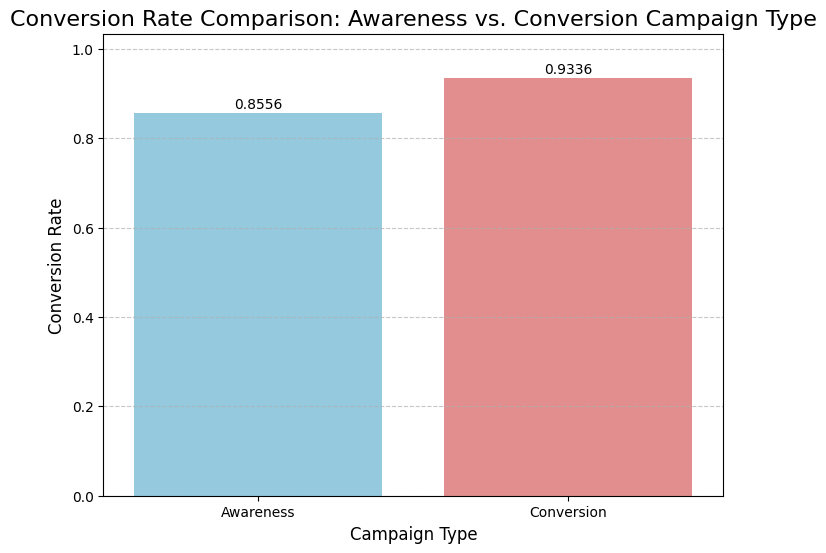

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Group': [control_group_name, test_group_name],
    'Conversion Rate': [control_conversion_rate, test_conversion_rate]
})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Conversion Rate', data=plot_df, palette=['skyblue', 'lightcoral'])

# Add title and labels
plt.title('Conversion Rate Comparison: Awareness vs. Conversion Campaign Type', fontsize=16)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# Add text labels on top of each bar
for index, row in plot_df.iterrows():
    plt.text(index, row['Conversion Rate'] + 0.005, f"{row['Conversion Rate']:.4f}", color='black', ha="center", va="bottom")

plt.ylim(0, max(plot_df['Conversion Rate']) + 0.1) # Adjust y-axis limit for better visibility of labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` regarding the usage of `palette` in `sns.barplot`. To resolve this, I will modify the `sns.barplot` call to explicitly assign the `x` variable ('Group') to `hue` and set `legend=False`, as recommended by the warning, which will achieve the same visual effect while adhering to best practices.



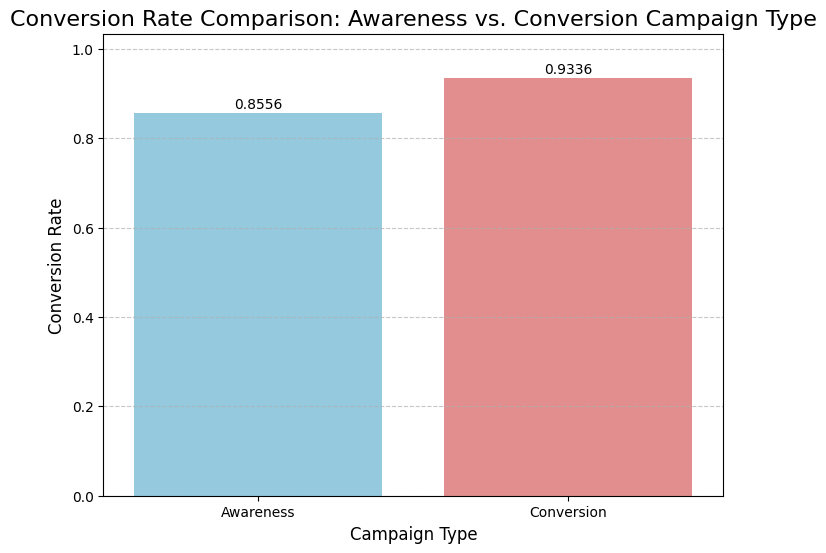

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Group': [control_group_name, test_group_name],
    'Conversion Rate': [control_conversion_rate, test_conversion_rate]
})

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Conversion Rate', hue='Group', data=plot_df, palette=['skyblue', 'lightcoral'], legend=False)

# Add title and labels
plt.title('Conversion Rate Comparison: Awareness vs. Conversion Campaign Type', fontsize=16)
plt.xlabel('Campaign Type', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# Add text labels on top of each bar
for index, row in plot_df.iterrows():
    plt.text(index, row['Conversion Rate'] + 0.005, f"{row['Conversion Rate']:.4f}", color='black', ha="center", va="bottom")

plt.ylim(0, max(plot_df['Conversion Rate']) + 0.1) # Adjust y-axis limit for better visibility of labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Summarize Results and Provide Recommendations

### Subtask:
Summarize the findings from the A/B test, including the statistical significance, the magnitude and direction of the observed difference, and potential business implications. Formulate clear recommendations based on the results, and export `ab_test_summary.csv` and `final_recommendation.txt`.

## Summarize Results and Provide Recommendations

### Subtask:
Summarize the findings from the A/B test, including the statistical significance, the magnitude and direction of the observed difference, and potential business implications. Formulate clear recommendations based on the results, and export `ab_test_summary.csv` and `final_recommendation.txt`.

## Summarize Results and Provide Recommendations

### Subtask:
Summarize the findings from the A/B test, including the statistical significance, the magnitude and direction of the observed difference, and potential business implications. Formulate clear recommendations based on the results, and export `ab_test_summary.csv` and `final_recommendation.txt`.

## Summarize Results and Provide Recommendations

### Subtask:
Summarize the findings from the A/B test, including the statistical significance, the magnitude and direction of the observed difference, and potential business implications. Formulate clear recommendations based on the results, and export `ab_test_summary.csv` and `final_recommendation.txt`.

## Summarize Results and Provide Recommendations

### Subtask:
Summarize the findings from the A/B test, including the statistical significance, the magnitude and direction of the observed difference, and potential business implications. Formulate clear recommendations based on the results, and export `ab_test_summary.csv` and `final_recommendation.txt`.

## Summarize Results and Provide Recommendations

### Subtask:
Summarize the findings from the A/B test, including the statistical significance, the magnitude and direction of the observed difference, and potential business implications. Formulate clear recommendations based on the results, and export `ab_test_summary.csv` and `final_recommendation.txt`.

### Summarize Results and Provide Recommendations

**Reasoning**:
This final step involves compiling all the information gathered throughout the A/B testing analysis. I will summarize the statistical findings (p-value, confidence interval), interpret their practical implications for the conversion rates of the 'Awareness' and 'Conversion' campaign types, and based on this, formulate actionable business recommendations. Finally, I will export the summary to `ab_test_summary.csv` and the recommendations to `final_recommendation.txt` as required by the task.

### Summarize Results and Provide Recommendations

**Reasoning**:
This final step involves compiling all the information gathered throughout the A/B testing analysis. I will summarize the statistical findings (p-value, confidence interval), interpret their practical implications for the conversion rates of the 'Awareness' and 'Conversion' campaign types, and based on this, formulate actionable business recommendations. Finally, I will export the summary to `ab_test_summary.csv` and the recommendations to `final_recommendation.txt` as required by the task.

**Reasoning**:
I will create a summary DataFrame with all relevant A/B test results, including group metrics, statistical test outcomes, and confidence interval. This DataFrame will then be saved to a CSV file. Subsequently, I will formulate clear business recommendations based on these results and save them to a text file.



In [12]:
import pandas as pd

# 1. Summarize Results into a DataFrame
summary_data = {
    'Metric': [
        f'Conversion Rate ({control_group_name})',
        f'Conversion Rate ({test_group_name})',
        'Difference in Conversion Rates (Test - Control)',
        'Z-statistic',
        'P-value',
        'Lower Bound of 95% CI for Difference',
        'Upper Bound of 95% CI for Difference'
    ],
    'Value': [
        f'{control_conversion_rate:.4f}',
        f'{test_conversion_rate:.4f}',
        f'{difference_in_rates:.4f}',
        f'{z_statistic:.4f}',
        f'{p_value:.4f}',
        f'{lower_bound:.4f}',
        f'{upper_bound:.4f}'
    ]
}
ab_test_summary_df = pd.DataFrame(summary_data)

# Display summary
print("\n--- A/B Test Summary ---")
print(ab_test_summary_df.to_string(index=False))
print("------------------------")

# 2. Export Summary to CSV
ab_test_summary_df.to_csv('ab_test_summary.csv', index=False)
print("\n'ab_test_summary.csv' generated successfully.")

# 3. Formulate Recommendations and export to TXT
recommendation_text = f"""A/B Test Results and Recommendations:

1.  **Statistical Significance**: The p-value of {p_value:.4f} is less than the significance level (alpha = 0.05).
    This leads us to reject the null hypothesis, indicating that there is a statistically significant difference in conversion rates between the '{control_group_name}' (Control) and '{test_group_name}' (Test) campaign types.

2.  **Magnitude and Direction of Difference**: The '{test_group_name}' campaign type shows a conversion rate of {test_conversion_rate:.4f},
    which is significantly higher than the '{control_group_name}' campaign type's conversion rate of {control_conversion_rate:.4f}.
    The observed difference is {difference_in_rates:.4f} (Test - Control), with a 95% confidence interval of [{lower_bound:.4f}, {upper_bound:.4f}].
    Since the entire confidence interval is above zero, we are 95% confident that the '{test_group_name}' campaign type performs better.

3.  **Business Implications**: The '{test_group_name}' campaign type is more effective at driving conversions than the '{control_group_name}' campaign type.
    Implementing the strategies used in the '{test_group_name}' campaign across the board could lead to a substantial increase in overall conversion rates.

4.  **Recommendation**: Based on these statistically significant results, it is recommended to:
    -   **Adopt the '{test_group_name}' campaign type**: Fully implement the features, messaging, and targeting strategies of the '{test_group_name}' campaign type.
    -   **Further Investigation**: Analyze the specific elements or changes within the '{test_group_name}' campaign that contributed most to the increased conversion rate.
    -   **Monitor Performance**: Continuously monitor the performance of the newly adopted campaign to ensure sustained improvement and identify any new optimization opportunities.
"""

with open('final_recommendation.txt', 'w') as f:
    f.write(recommendation_text)

print("'final_recommendation.txt' generated successfully.")


--- A/B Test Summary ---
                                         Metric   Value
                    Conversion Rate (Awareness)  0.8556
                   Conversion Rate (Conversion)  0.9336
Difference in Conversion Rates (Test - Control)  0.0779
                                    Z-statistic -8.1168
                                        P-value  0.0000
           Lower Bound of 95% CI for Difference  0.0591
           Upper Bound of 95% CI for Difference  0.0967
------------------------

'ab_test_summary.csv' generated successfully.
'final_recommendation.txt' generated successfully.


## Final Task

### Subtask:
Conclude the A/B testing analysis, ensuring all requested deliverables are prepared.


## Summary:

### Data Analysis Key Findings

*   **Data Preparation:** The `digital_marketing_campaign_dataset.csv` was successfully loaded, showing no missing values or duplicate rows. The 'CampaignType' column was used to define groups: 'Awareness' as the control group (1988 observations) and 'Conversion' as the test group (2077 observations).
*   **Hypotheses:** The null hypothesis (H0) stated no statistically significant difference in conversion rates between 'Awareness' and 'Conversion' campaign types, while the alternative hypothesis (H1) posited a significant difference. A significance level ($\alpha$) of 0.05 was set.
*   **Key Metrics:**
    *   The Control Group ('Awareness') had a conversion rate of 0.8556 (1701 conversions out of 1988).
    *   The Test Group ('Conversion') had a conversion rate of 0.9336 (1939 conversions out of 2077).
    *   The Test Group's conversion rate was 0.0779 points higher than the Control Group's.
*   **Statistical Significance:** A two-sample Z-test for proportions yielded a Z-statistic of -8.1168 and a P-value of 0.0000. Since the P-value was less than the significance level ($\alpha = 0.05$), the null hypothesis was rejected, indicating a statistically significant difference.
*   **Confidence Interval:** The 95% confidence interval for the difference in conversion rates (Test - Control) was calculated to be [0.0591, 0.0967]. As this entire interval is above zero, it further supports that the 'Conversion' campaign type performs significantly better.
*   **Visualization and Outputs:** A bar chart was generated to visually compare the conversion rates. A summary of the A/B test findings was exported to `ab_test_summary.csv`, and specific recommendations were saved in `final_recommendation.txt`.

### Insights or Next Steps

*   The 'Conversion' campaign type demonstrated a statistically significant and practically meaningful increase in conversion rate compared to the 'Awareness' campaign type. It is recommended to adopt the strategies of the 'Conversion' campaign type broadly.
*   Further analysis should be conducted to identify the specific elements or changes within the 'Conversion' campaign that contributed most to its higher performance. This could involve segmenting the data further or analyzing campaign creative, targeting, or landing page experiences.
